In [37]:
from sklearn import tree
import pandas as pd
import os

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv(os.path.join("Final_Dataset.csv"))
df.head()

,region,year,lifetime_risk,mortality_ratio,private_expenditure,government_expenditure,gdp_capita
0,East Asia & Pacific,2000,0.21,113,29.52,4.34,7178.89
1,Europe & Central Asia,2000,0.05,33,24.49,5.88,22220.70
2,Latin America & Caribbean,2000,0.29,99,56.91,2.53,11458.67
3,Middle East & North Africa,2000,0.38,113,44.46,2.48,13554.73
4,North America,2000,0.02,12,54.50,5.56,45146.13


In [39]:
# Use Pandas get_dummies to convert categorical data
df_dummies = pd.get_dummies(df)
df_dummies.head()

,year,lifetime_risk,mortality_ratio,private_expenditure,government_expenditure,gdp_capita,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
0,2000,0.21,113,29.52,4.34,7178.89,1,0,0,0,0,0,0
1,2000,0.05,33,24.49,5.88,22220.70,0,1,0,0,0,0,0
2,2000,0.29,99,56.91,2.53,11458.67,0,0,1,0,0,0,0
3,2000,0.38,113,44.46,2.48,13554.73,0,0,0,1,0,0,0
4,2000,0.02,12,54.50,5.56,45146.13,0,0,0,0,1,0,0


In [40]:
# Set x and y
X = df_dummies.drop("mortality_ratio", axis=1)
y = df_dummies[("mortality_ratio")]

In [41]:
# Split between train and test
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.model_selection import train_test_split
X_train = df_dummies[df_dummies['year'] < 2010].drop("mortality_ratio", axis=1)
y_train = df_dummies[df_dummies['year'] < 2010]['mortality_ratio']
X_test = df_dummies[df_dummies['year'] >= 2010].drop("mortality_ratio", axis=1)
y_test = df_dummies[df_dummies['year'] >= 2010]['mortality_ratio']

In [43]:
target = df_dummies["mortality_ratio"]
target_names = ["negative", "positive"]

data = df_dummies.drop("mortality_ratio", axis=1)
feature_names = data.columns
data.head()

,year,lifetime_risk,private_expenditure,government_expenditure,gdp_capita,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
0,2000,0.21,29.52,4.34,7178.89,1,0,0,0,0,0,0
1,2000,0.05,24.49,5.88,22220.70,0,1,0,0,0,0,0
2,2000,0.29,56.91,2.53,11458.67,0,0,1,0,0,0,0
3,2000,0.38,44.46,2.48,13554.73,0,0,0,1,0,0,0
4,2000,0.02,54.50,5.56,45146.13,0,0,0,0,1,0,0


In [44]:
X_test.head()

,year,lifetime_risk,private_expenditure,government_expenditure,gdp_capita,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
70,2010,0.13,30.64,4.38,11964.95,1,0,0,0,0,0,0
71,2010,0.03,22.26,7.03,27035.97,0,1,0,0,0,0,0
72,2010,0.19,55.07,3.51,13701.07,0,0,1,0,0,0,0
73,2010,0.28,46.06,2.53,16802.83,0,0,0,1,0,0,0
74,2010,0.03,49.87,7.94,48516.51,0,0,0,0,1,0,0


In [45]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9749871849610151


In [46]:
import graphviz 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [48]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier(random_state = 41)
param_grid = {'max_depth': [2, 3, 5, 8]}
gs_model = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv= 5)
gs_model.fit(X_train, y_train)
print(gs_model.best_params_)
gs_predictions = gs_model.predict(X_test)

{'max_depth': 3}


/Users/devinwilson/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/devinwilson/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[Text(202.76542968750002, 207.55636363636364, 'X[1] <= 1.4\nentropy = 49657.343\nsamples = 112\nvalue = 178.179'),
 Text(103.862109375, 187.7890909090909, 'X[3] <= 1.545\nentropy = 7009.405\nsamples = 95\nvalue = 91.758'),
 Text(24.4125, 168.0218181818182, 'X[4] <= 3467.17\nentropy = 3375.956\nsamples = 15\nvalue = 261.333'),
 Text(11.625, 148.25454545454545, 'X[1] <= 1.115\nentropy = 913.583\nsamples = 6\nvalue = 323.5'),
 Text(6.9750000000000005, 128.48727272727274, 'X[2] <= 76.905\nentropy = 182.0\nsamples = 3\nvalue = 297.0'),
 Text(4.65, 108.72, 'X[4] <= 3238.34\nentropy = 56.25\nsamples = 2\nvalue = 288.5'),
 Text(2.325, 88.95272727272729, 'entropy = 0.0\nsamples = 1\nvalue = 296.0'),
 Text(6.9750000000000005, 88.95272727272729, 'entropy = 0.0\nsamples = 1\nvalue = 281.0'),
 Text(9.3, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = 314.0'),
 Text(16.275000000000002, 128.48727272727274, 'X[2] <= 76.44\nentropy = 240.667\nsamples = 3\nvalue = 350.0'),
 Text(13.950000000000001, 108.72,

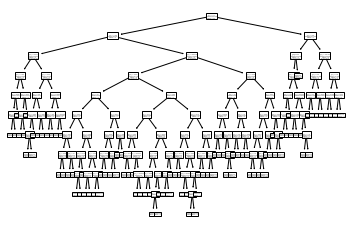

In [49]:
tree.plot_tree(clf.fit(data, target))

In [50]:
# Calculate the model.score (R squared)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"R-squared (R2) Train: {training_score}")
print(f"R-squared (R2) Test: {testing_score}")

R-squared (R2) Train: 1.0
R-squared (R2) Test: 0.09523809523809523


In [51]:
# Calculate the model.predict
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

# Run mean scored error
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

print(f"Mean Squared Error (MSE) Train: {mse_train}")
print(f"Mean Squared Error (MSE) Test: {mse_test}")

Mean Squared Error (MSE) Train: 0.0
Mean Squared Error (MSE) Test: 988.047619047619
